In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('./data/11-26/daily_plutchik_threshold_5.csv', parse_dates=['month/day'])
df.head()

,month/day,Anger,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation
0,2017-05-07,0.010870,0.021739,0.086957,0.097826,0.032609,0.097826,0.652174,0.000000
1,2017-05-08,0.015785,0.019732,0.071823,0.099448,0.021310,0.105762,0.654301,0.011839
2,2017-05-09,0.018973,0.024554,0.063616,0.093750,0.035714,0.100446,0.652902,0.010045
3,2017-05-10,0.021674,0.033715,0.060205,0.099338,0.031306,0.095725,0.645394,0.012643
4,2017-05-11,0.017838,0.033578,0.055614,0.134313,0.035677,0.123820,0.597062,0.002099


In [2]:
import numpy as np
import pandas as pd

def zscore(df, col):
    col_mean = df[col].rolling(window=10).mean()
    col_std = df[col].rolling(window=10).std()
    return (df[col] - col_mean)/col_std

In [3]:
df["Anticipation Z-Score"] = zscore(df, "Anticipation")
df["Trust Z-Score"] = zscore(df, "Trust")
df["Surprise Z-Score"] = zscore(df, "Surprise")
df["Sadness Z-Score"] = zscore(df, "Sadness")
df["Joy Z-Score"] = zscore(df, "Joy")
df["Fear Z-Score"] = zscore(df, "Fear")
df["Disgust Z-Score"] = zscore(df, "Disgust")
df["Anger Z-Score"] = zscore(df, "Anger")

In [4]:
import datetime as datetime
start_date = datetime.datetime(2017, 5, 1, 0, 0)
end_date = datetime.datetime(2017, 6, 30, 0, 0)
df["month/day"] = pd.to_datetime(df["month/day"])
paris_accord_df = df[(df['month/day'] >= start_date) & (df['month/day'] <= end_date)]
paris_accord_df.head()

,month/day,Anger,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation,Anticipation Z-Score,Trust Z-Score,Surprise Z-Score,Sadness Z-Score,Joy Z-Score,Fear Z-Score,Disgust Z-Score,Anger Z-Score
0,2017-05-07,0.010870,0.021739,0.086957,0.097826,0.032609,0.097826,0.652174,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-05-08,0.015785,0.019732,0.071823,0.099448,0.021310,0.105762,0.654301,0.011839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-05-09,0.018973,0.024554,0.063616,0.093750,0.035714,0.100446,0.652902,0.010045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-05-10,0.021674,0.033715,0.060205,0.099338,0.031306,0.095725,0.645394,0.012643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-05-11,0.017838,0.033578,0.055614,0.134313,0.035677,0.123820,0.597062,0.002099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


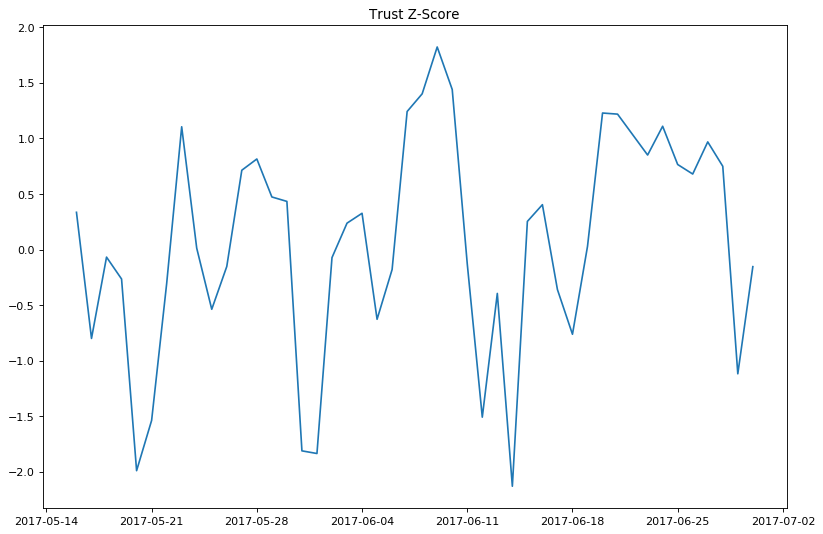

In [5]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Trust Z-Score', data=paris_accord_df)
plt.title("Trust Z-Score")
plt.show()

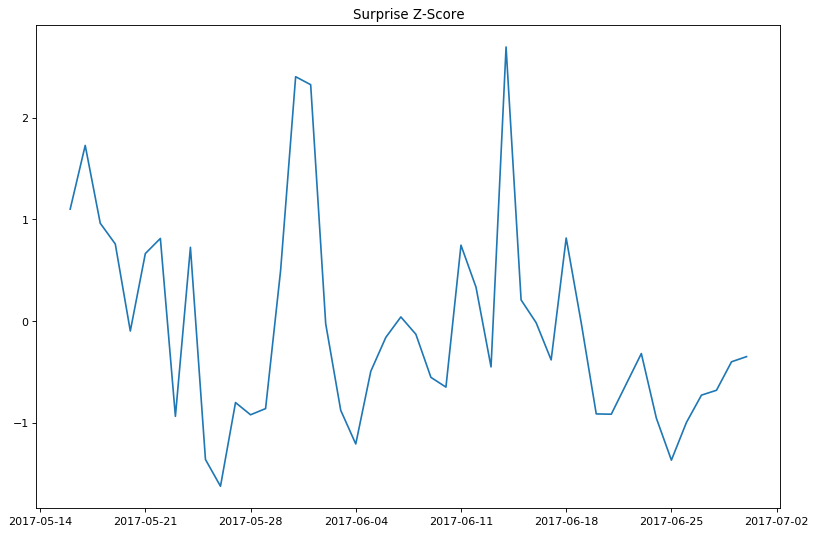

In [6]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Surprise Z-Score', data=paris_accord_df)
plt.title("Surprise Z-Score")
plt.show()

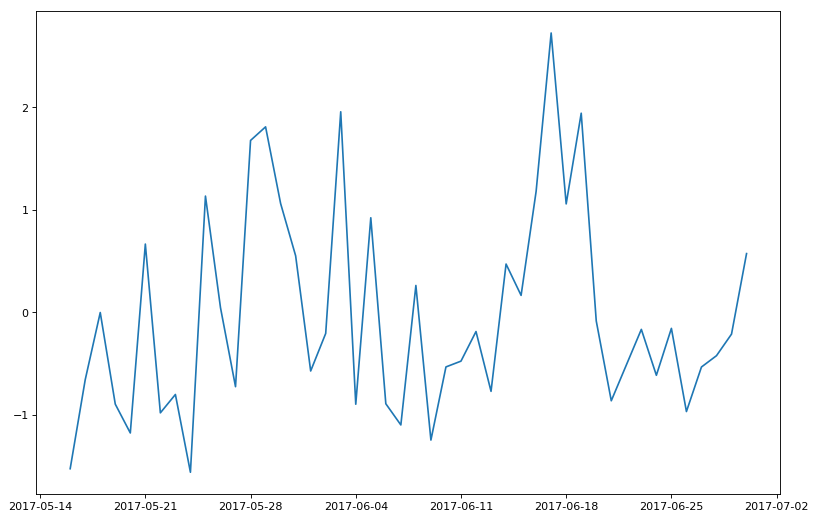

In [7]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Sadness Z-Score', data=paris_accord_df)
plt.show()

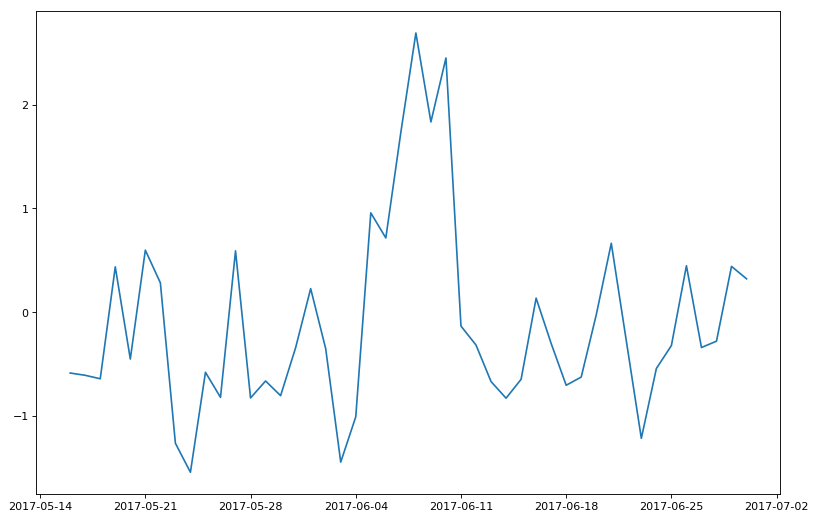

In [8]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Anticipation Z-Score', data=paris_accord_df)
plt.show()

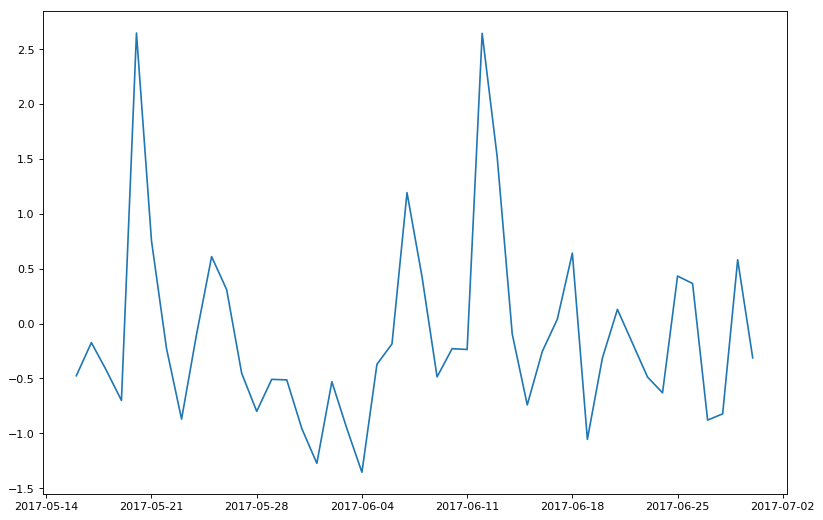

In [9]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Joy Z-Score', data=paris_accord_df)
plt.show()

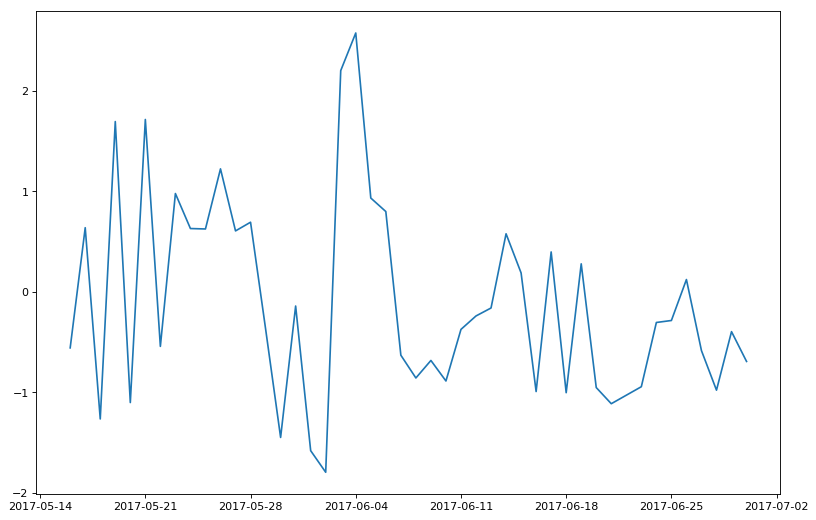

In [10]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Fear Z-Score', data=paris_accord_df)
plt.show()

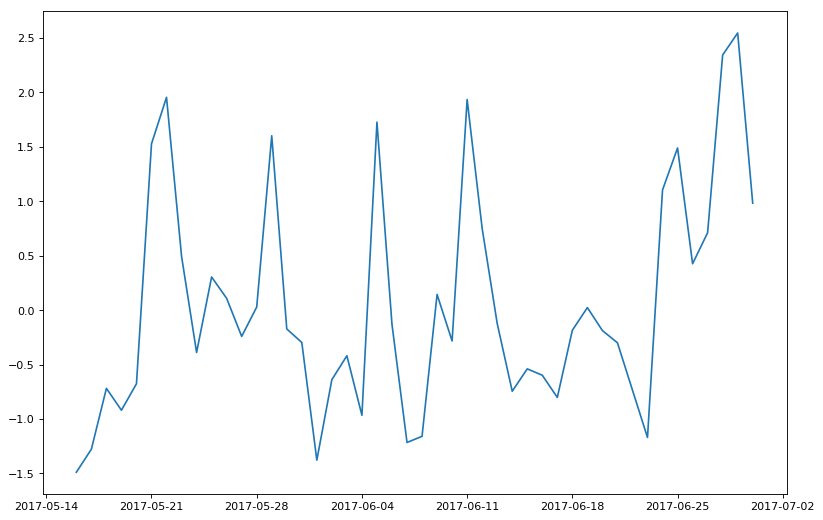

In [11]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Disgust Z-Score', data=paris_accord_df)
plt.show()

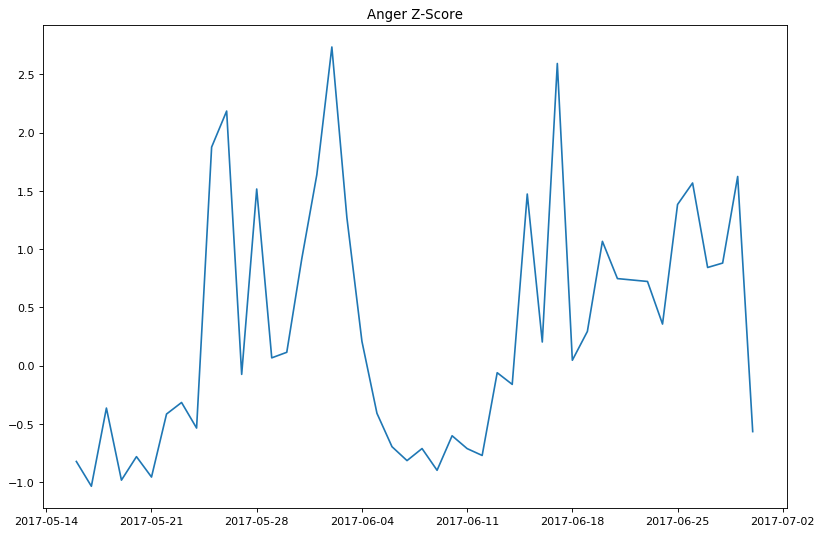

In [12]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Anger Z-Score', data=paris_accord_df)
plt.title("Anger Z-Score")
plt.show()

In [13]:
z_scores_df = df["Trust Z-Score"]
print(len(z_scores_df))

print(len(z_scores_df.dropna()))

714
705


In [14]:
significant_df = df[(df['Trust Z-Score'] >= 2) | (df['Trust Z-Score'] <= -2)]
significant_df.head()
print(len(significant_df))

25


In [15]:
start_date = datetime.datetime(2018, 1, 15, 0, 0)
end_date = datetime.datetime(2018, 2, 15, 0, 0)
df["month/day"] = pd.to_datetime(df["month/day"])
unemployment_low_df = df[(df['month/day'] >= start_date) & (df['month/day'] <= end_date)]
unemployment_low_df.head()

,month/day,Anger,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation,Anticipation Z-Score,Trust Z-Score,Surprise Z-Score,Sadness Z-Score,Joy Z-Score,Fear Z-Score,Disgust Z-Score,Anger Z-Score
252,2018-01-15,0.035802,0.014815,0.048148,0.148148,0.020988,0.056790,0.671605,0.003704,-0.561540,0.900833,-1.876041,-0.280709,0.797243,-0.556644,-1.302034,1.289184
253,2018-01-16,0.018657,0.014925,0.072761,0.134328,0.016791,0.087687,0.649254,0.005597,0.084324,0.245748,-0.156075,-1.257376,-0.077234,1.422491,-1.250114,-1.082003
254,2018-01-17,0.018717,0.026738,0.057487,0.140374,0.030749,0.116310,0.601604,0.008021,0.887959,-1.185093,1.298059,2.054582,0.255420,0.030973,0.464834,-0.889256
255,2018-01-18,0.034988,0.017901,0.051261,0.125305,0.022783,0.079740,0.666395,0.001627,-1.192155,0.680441,-0.462818,0.097970,-0.520498,-0.559163,-0.792224,1.433461
256,2018-01-19,0.025100,0.022088,0.060241,0.136546,0.028112,0.077309,0.644578,0.006024,0.516793,0.007285,-0.555897,1.210299,0.251898,0.134935,-0.098374,-0.125539


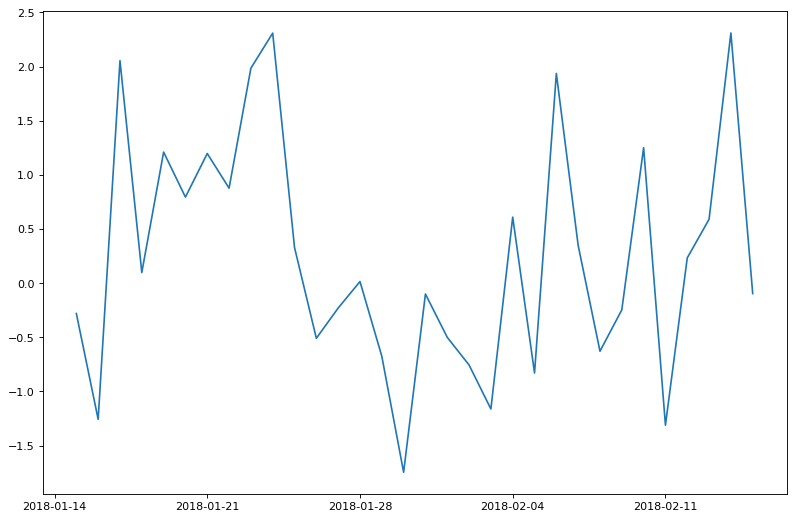

In [16]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot('month/day', 'Sadness Z-Score', data=unemployment_low_df)
plt.show()